In [3]:
import numpy as np
a = np.array([[4,-7],
              [2,-3]])
a_inv = np.linalg.inv(a)
print(a_inv)
print(a@a_inv)
print(a_inv@a)

[[-1.5  3.5]
 [-1.   2. ]]
[[1. 0.]
 [0. 1.]]
[[1. 0.]
 [0. 1.]]


In [4]:
import numpy as np
b = np.array([[1,2],
              [4,8]])
b_inv = np.linalg.inv(b)

LinAlgError: Singular matrix

In [5]:
import numpy as np
B = np.array([[1,2],
             [4,9],
             [4,8]])
b_inv = np.linalg.inv(B)

LinAlgError: Last 2 dimensions of the array must be square

In [6]:
print('總金額 除以 單價')
print('總金額 乘以 單價的反矩陣')
print('得到反矩陣代表可以被整除')
price1=np.array([[3,3.5],
                 [3.2,3.6]])
total=[[118.4,135.2]]
try:
  price1_inv=np.linalg.inv(price1)
  print(price1_inv)
  print(np.dot(total,price1_inv))
  c = total@price1_inv #算出小孩人數 大人人數
  print(c)  
  print(c@price1) #算回總金額
except:
  print('得不到反矩陣')

總金額 除以 單價
總金額 乘以 單價的反矩陣
得到反矩陣代表可以被整除
[[-9.    8.75]
 [ 8.   -7.5 ]]
[[16. 22.]]
[[16. 22.]]
[[118.4 135.2]]


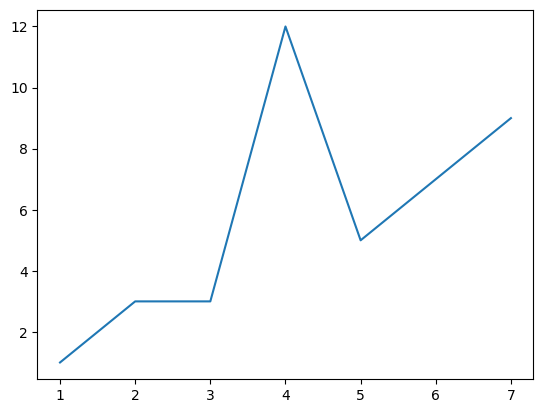

In [7]:
import numpy as np
import matplotlib.pyplot as plt
x=np.arange(1,8)
y=[1,3,3,12,5,7,9]
plt.plot(x,y)
plt.show()

1.2142857142857144 0.8571428571428541


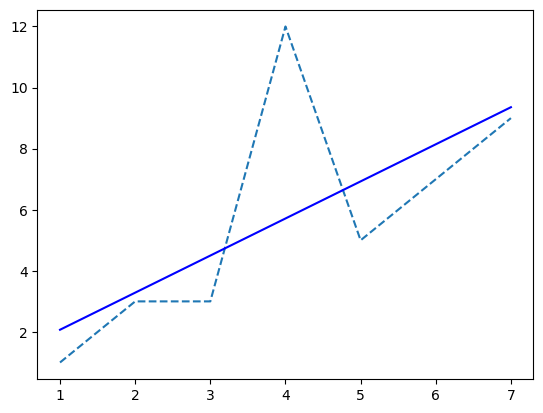

In [8]:
# 給定x 與 y幫我算出線性方程
slope,intercept=np.polyfit(x,y,1) #1代表1次方 
#slope斜率 intercept 截距 y = mx + b 
print(slope,intercept)
y1=[slope*i+intercept for i in x]
plt.plot(x,y,'--')
plt.plot(x,y1,'b')
plt.show()

-0.26190476190476225 3.309523809523811 -2.2857142857142865


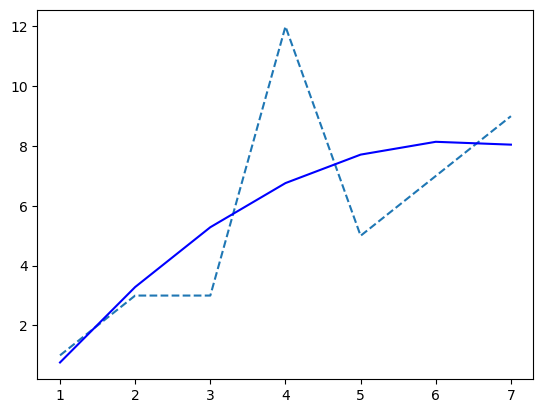

In [9]:
slope1,slope2,intercept=np.polyfit(x,y,2) #2代表2次方
# y = slope1x^2 + slope2x + intercept
print(slope1,slope2,intercept)
y1=[slope1*i**2+slope2*i+intercept for i in x]
plt.plot(x,y,'--')
plt.plot(x,y1,'b')
plt.show()

In [11]:
import sympy as sp
x = sp.Symbol("x")
y = sp.Symbol("y")
#2x + 3y  = 23
#x + 4y   = 24
f1 = 2*x + 3*y - 23
f2 = x + 4*y - 24
print(sp.solve([f1,f2],[x,y]))

{x: 4, y: 5}


In [12]:
#x+y=20
#50x+30y=800
import sympy as sp
x = sp.Symbol("x")
y = sp.Symbol("y")
f1 = x + y - 20
f2 = 50*x +30*y-800
print(sp.solve([f1,f2],[x,y]))

{x: 10, y: 10}


In [13]:
# x + y =20
# 50X + 30y = 800
import numpy as np
a1 = np.array([[1,50],
 [1,30]])
#Ab = c 
a2 = np.array([20,800])
a_inv = np.linalg.inv(a1)
print(a2@a_inv)

[10. 10.]


因為平方前面的係數是正數，所以會有最小值
-8
2


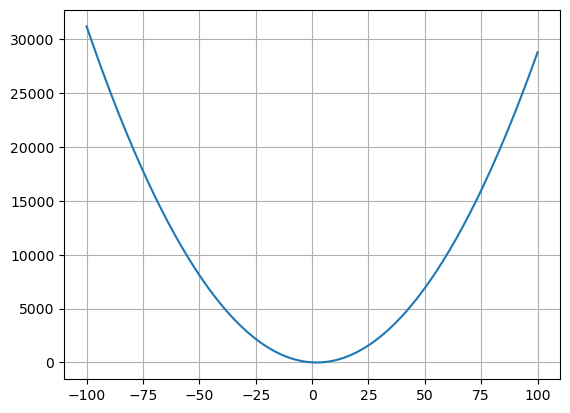

In [14]:
import  matplotlib.pyplot as plt
import  numpy as np
x=np.arange(-100,101,1)
y=3*np.power(x,2)-12*x+4
print('因為平方前面的係數是正數，所以會有最小值')
print(np.min(y))#找出y最小
print(x[y.argmin()]) #找出x最小
plt.plot(x,y)
plt.grid()
plt.show()

因為平方前面的係數是負數，所以會有最大值
16
-2


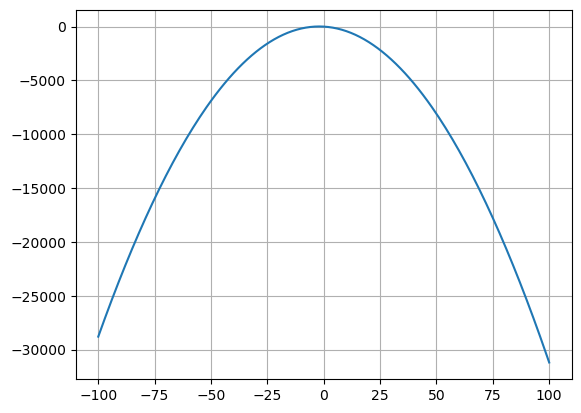

In [15]:
import  matplotlib.pyplot as plt
import  numpy as np
x=np.arange(-100,101,1)
y=-3*np.power(x,2)-12*x+4
print('因為平方前面的係數是負數，所以會有最大值')
print(np.max(y))
print(x[y.argmax()])
plt.plot(x,y)
plt.grid()
plt.show()

In [16]:
import pandas as pd
tvmarketing=pd.read_csv('tvmarketing.csv')
print(tvmarketing.head())
print(tvmarketing.isnull().any())
print(tvmarketing.dtypes)

      TV  Sales
0  230.1   22.1
1   44.5   10.4
2   17.2    9.3
3  151.5   18.5
4  180.8   12.9
TV       False
Sales    False
dtype: bool
TV       float64
Sales    float64
dtype: object


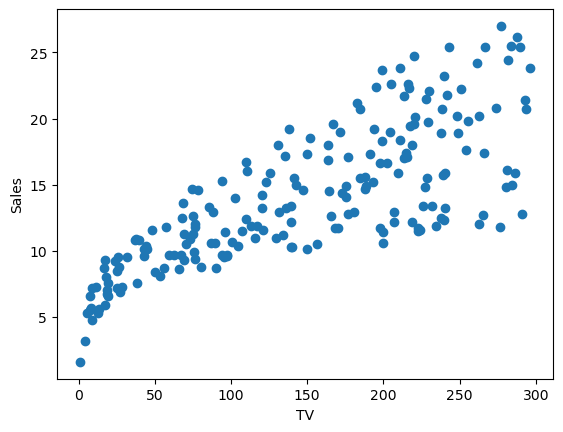

In [17]:
import matplotlib.pyplot as plt
plt.scatter(tvmarketing['TV'],tvmarketing['Sales'])
plt.xlabel('TV')#營銷預算
plt.ylabel('Sales')#銷售額
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
import sklearn.linear_model
print('我們先建立X與y資料，後續才能進行切割')
X=tvmarketing['TV']
y=tvmarketing['Sales']

print('準備做資料切割')
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)# 70% 做訓練 30%做測試
print(X_train.shape)
print(X_test.shape)

我們先建立X與y資料，後續才能進行切割
準備做資料切割
(140,)
(60,)


In [21]:
model=sklearn.linear_model.LinearRegression()
import numpy as np
X_train=np.array(X_train).reshape(-1,1)#一維轉二維滿足 model.fit() 的要求
#print(X_train)
print(X_train.shape)
model.fit(X_train,y_train) 
print('迴歸係數：',model.coef_)
print('截距：',model.intercept_)

(140, 1)
迴歸係數： [0.04868657]
截距： 6.712732743363228


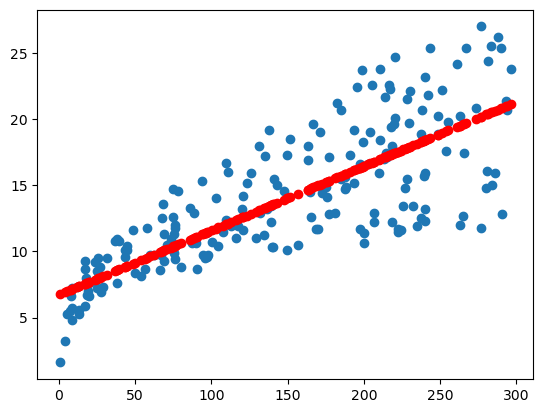

In [22]:
import matplotlib.pyplot as plt
X2=np.array(X).reshape(1,-1)
y2=(model.coef_)*X2+model.intercept_ #線性方程
plt.scatter(X2,y)
plt.scatter(X2,y2,c='red')
plt.show()

In [23]:
print('進行預估')
print('我們預估X_test 預估測試的資料 預估之後會產生結果')
print('例如y_pred')
print('我們拿預估之後的結果y_pred與y_test測試的目標來做比較')
print('比較預估結果與真實結果是否相同')
X_test=np.array(X_test).reshape(-1,1)
y_pred=model.predict(X_test)
print(y_pred)
print('正確結果如下')
print(np.array(y_test))

進行預估
我們預估X_test 預估測試的資料 預估之後會產生結果
例如y_pred
我們拿預估之後的結果y_pred與y_test測試的目標來做比較
比較預估結果與真實結果是否相同
[12.10233613 17.43838428 16.91743797  7.92989701  8.05161344 15.05274231
 11.60086445 16.40622898 14.77522886 16.69347975  7.65725222 17.10244694
 16.39649167 18.12973359 18.80647692 16.33319913 12.05851821  7.28236562
 17.24850666 15.71487968 10.04289418 19.0693844  20.63709198  6.74681334
 20.55432481  8.56282243 16.22608867 15.23775128 17.26798128 10.43238675
 15.60290056  7.87147313 10.61739572 17.414041   18.92819335 15.26696323
  7.53553579 15.71487968 13.67004371 16.33319913 10.52002258 12.20944658
 16.97586186 17.3117992  12.57946452 15.86093939 21.00710992  7.092488
  9.51221056 17.35074845  8.24635972  7.66698953 19.5124322  20.37905316
 17.82787685 14.00111239 11.71284356 17.61852459 16.78111558  9.44891802]
正確結果如下
[16.  24.7 15.9  7.2  6.9 19.  10.7 18.3 12.6 22.6  6.6 17.  23.7 11.9
 20.2 11.7 16.7  7.3 22.6 15.5 13.6 17.6 15.9  1.6 15.  10.9 22.4 14.9
 22.3  9.4 21.2  9.2  8.8 19.6